In [1]:
!pip install -U tensorflow opencv-python-headless pytesseract scikit-learn

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.meta

In [2]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 985.5 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/7.8 MB 1.1 MB/s eta 0:00:07
   ---- ----------------------------------- 0.8/7.8 MB 1.1 MB/s eta 0:00:07
   ---- ----------------------------------- 0.8/7.8 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/7.8 MB 894.7 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.8 MB 894.7 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.

In [3]:
!pip install numpy

Texto extraído: 2026.02.26
0000102808
118887
El formato y el año son válidos.


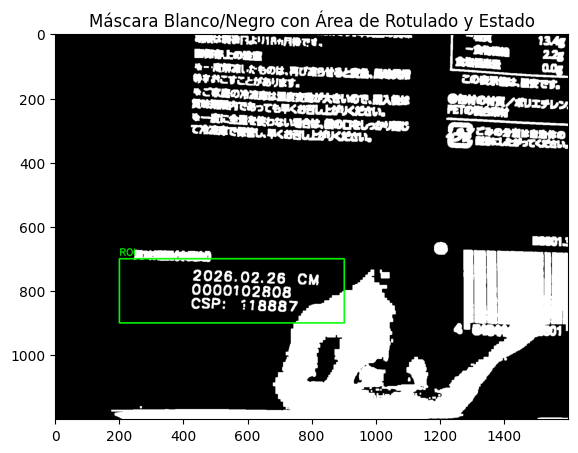

In [1]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import re

# Ruta de Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


image_path = 'etiqueta.JPG'

x_min, x_max = 200, 900  # Rango en el eje x del área esperada
y_min, y_max = 700, 900  # Rango en el eje y del área esperada

# Cargar y procesar la imagen
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,3)

_, mask = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY_INV)

# Extraer la región de interés (ROI)
roi = mask[y_min:y_max, x_min:x_max]

# Detectar contornos en la ROI
contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mejorar el texto aplicando dilatación
kernel = np.ones((5, 5), np.uint8)
roi_dilated = cv2.dilate(roi, kernel, iterations=1)

# Invertir colores para OCR
roi_dilated = cv2.bitwise_not(roi_dilated)

# Extraer texto con OCR en la ROI
extracted_text = pytesseract.image_to_string(roi_dilated, config='--psm 6 -c tessedit_char_whitelist=0123456789.')


# Validar el formato del texto extraído usando regex
pattern = r"^(\d{4})\.(\d{2})\.(\d{2})\s\d{10}\s\d{6}$"
match=  re.match(pattern, extracted_text.strip())

if match:
    # Extraer el año y verificar si es mayor que 2024
    year = int(match.group(1))
    if year > 2025:
        print("Texto extraído:", extracted_text.strip())
        print("El formato y el año son válidos.")
    else:
        print("Texto extraído:", extracted_text.strip())
        print("El año extraído no es válido.")
else:
    print("Texto extraído:", extracted_text.strip())
    print("El formato del texto extraído no es válido.")

# Texto y color para la visualización
# ROI
approval_text = "ROI"
color = (0, 255, 0) 



# Dibujar el rectángulo y estado en la imagen para visualización
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
output_image = cv2.dilate(output_image, kernel, iterations=1)

# Rectángulo alrededor de la ROI
cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), color, 3)
cv2.putText(output_image, approval_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)



# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Máscara Blanco/Negro con Área de Rotulado y Estado")
plt.show()

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Función para preprocesar la imagen
def preprocess_image(img):
    img_resized = cv2.resize(img, (128, 128))  # Redimensionar a 128x128
    img_normalized = img_resized / 255.0  # Normalizar entre 0 y 1
    return np.expand_dims(img_normalized, axis=0)

# Cargar las imágenes (asegúrate de que estén en el directorio correcto)
etiqueta_img = cv2.imread('etiqueta.JPG')  # Imagen con etiqueta
no_etiqueta_img = cv2.imread('no_etiqueta_image.jpg')  # Imagen sin etiqueta

# Preprocesar las imágenes
etiqueta_img = preprocess_image(etiqueta_img)
no_etiqueta_img = preprocess_image(no_etiqueta_img)

# Etiquetas: 1 para "etiqueta", 0 para "no etiqueta"
y_etiqueta = 1
y_no_etiqueta = 0

# Crear las entradas y las etiquetas
X_train = np.vstack([etiqueta_img, no_etiqueta_img])  # Apilar las imágenes
y_train = np.array([y_etiqueta, y_no_etiqueta])  # Etiquetas correspondientes

# Convertir las etiquetas a formato categórico (opcional, si usas `categorical_crossentropy`)
y_train = to_categorical(y_train, num_classes=2)


In [3]:
# Definir el modelo
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # 2 clases: etiqueta y no etiqueta
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo
model = create_model()

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=2)

# Guardar el modelo entrenado
model.save('etiqueta_classifier_single_image.h5')


c:\Users\joans\Desktop\Vitafood\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.7009
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5000 - loss: 2.0953
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.5000 - loss: 0.4591
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.0994
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5000 - loss: 0.3685
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5000 - loss: 0.4671
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 1.0000 - loss: 0.2216
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 1.0000 - loss: 1.7658e-04
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 0.0823
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 1.1623e-05


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Cargar el modelo
from tensorflow.keras.models import load_model


# Cargar el modelo entrenado
model = load_model('etiqueta_classifier_single_image.h5')

# Realizar predicciones en los datos de entrenamiento (o de prueba)
y_pred = model.predict(X_train)  # Predicciones del modelo

# Convertir las probabilidades a clases (0 o 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las clases verdaderas (0 o 1)
y_true = np.argmax(y_train, axis=1)

# Evaluar las métricas
def evaluate_metrics(y_true, y_pred_classes):
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Evaluar las métricas
evaluate_metrics(y_true, y_pred_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [6]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Texto de referencia (lo que debería haber sido reconocido)
ground_truth = "2024.11.14"

# Texto extraído por OCR
ocr_text = "2024.11.14"

# Función para calcular la exactitud de carácter
def character_accuracy(ground_truth, ocr_text):
    correct_chars = sum(c1 == c2 for c1, c2 in zip(ground_truth, ocr_text))
    return correct_chars / len(ground_truth)

# Función para calcular la precisión de palabra
def word_accuracy(ground_truth, ocr_text):
    ground_truth_words = ground_truth.split()
    ocr_text_words = ocr_text.split()
    correct_words = sum(gw == ow for gw, ow in zip(ground_truth_words, ocr_text_words))
    return correct_words / len(ground_truth_words)

# Calcular las métricas
char_acc = character_accuracy(ground_truth, ocr_text)
word_acc = word_accuracy(ground_truth, ocr_text)

# Comparación de palabras
precision = precision_score([ground_truth], [ocr_text], average='binary')
recall = recall_score([ground_truth], [ocr_text], average='binary')
f1 = f1_score([ground_truth], [ocr_text], average='binary')

print(f"Exactitud de Carácter: {char_acc:.4f}")
print(f"Precisión de Palabra: {word_acc:.4f}")



Exactitud de Carácter: 1.0000
Precisión de Palabra: 1.0000


c:\Users\joans\Desktop\Vitafood\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joans\Desktop\Vitafood\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joans\Desktop\Vitafood\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
